In [145]:
import pandas as pd
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style="whitegrid")
sb.set(rc={'figure.figsize':(11.7,8.27)})

In [146]:
df = pd.read_excel('./Grupo 01.xlsx')
#TODO: cuantitativas cosntruir un grafico
#TODO: grafico para cualitativas
#TODO: medidas de tendencia central para precio segun el parqueadero
#TODO: medias de tendencia central para mt2 segun si esta terminaod o no
#TODO: box-plot para las ultimas dos tareas

## Center's Measurement

In [173]:
variables = ['precio','mt2','estrato','alcobas','banos','administracion','avaluo']

var_media = [round(df[i].mean(),2) for i in variables]
var_mediana = [round(df[i].median(),2) for i in variables]
var_mode = [round(df[i].mode(),2) for i in variables]

df_variables = pd.DataFrame(var_media)
df_variables.columns = ['Media']
df_variables['Mediana'] = var_mediana
df_variables['Moda'] = var_mode
df_variables

TypeError: list indices must be integers or slices, not range

## Scattering's Measurement

In [148]:
var_std = [round(df[i].std(),2) for i in variables]
# var_std
var_min = [df[i].min() for i in variables]
# var_min
var_max = [df[i].max() for i in variables]
# var_max
var_q1 = [round(df[i].quantile(q=0.25),2) for i in variables]
# var_q1
var_q3 = [round(df[i].quantile(q=0.75),2) for i in variables]
# var_q3
var_var = [round(df[i].var(),2) for i in variables]
# var_var
var_asi = [round(df[i].skew(),2) for i in variables]
# var_asi
var_kur = [round(kurtosis(df[i], fisher=False),2) for i in variables]
# var_kur
var_range = [df[i].max() - df[i].min() for i in variables]
# var_range

### Cualitative variable types

In [149]:
def get_acum (dataframe,option):
    """Funcion que llena un arreglo <storaged> con los valores acumulados
       de la suma de cada elemento dentro del <dataframe>
    """
    acum = 0
    storaged = []

    if option == 1: #opcion para obtener la frecuncia absoluta
       values = dataframe['Frecuencia_absoluta'].values

       for i in values:
            acum = acum + i
            storaged.append(acum)

       dataframe['Frec_absoluta_acumulada'] = storaged

    elif option == 2: #opcion para obtener la frecuencia relativa
        values = dataframe['Frecuencia_relativa'].values

        for i in values:
            acum = acum + i
            storaged.append(acum)

        dataframe['Frec_relativa_acumulada'] = storaged

def get_frec_ab (values):
    """Funcion que retorna un dataframe.
       Se obtiene la frec_ab y se conviente en dataframe.
    """
    frec_ab = values.value_counts()
    frec_df = pd.DataFrame(frec_ab)
    frec_df.columns = ['Frecuencia_absoluta']
    return frec_df

def get_frec_rel (dataframe,source):
    """Funcion que actualiza el parametro <datagrame> anadiendo la columna
       de frec_relativas.
    """
    dataframe['Frecuencia_relativa'] = round(dataframe['Frecuencia_absoluta'] * 100 / len(source),3)


In [150]:
var_ubicacion = df['ubicacion']

'''Frecuencia absoluta'''

frec_ubicacion = get_frec_ab(var_ubicacion)

'''Frecuencia relativa'''

get_frec_rel(frec_ubicacion,var_ubicacion)

'''Frecuencia absoluta acumulada'''
get_acum(frec_ubicacion,1)

'''Frecuencia relativa acumulada'''

get_acum(frec_ubicacion,2)

In [151]:
var_balcon = df['balcon']


'''Frecuencia absoluta'''

frec_balcon = get_frec_ab(var_balcon)

'''Frecuencia relativa'''

get_frec_rel(frec_balcon,var_balcon)

'''Frecuencia absoluta acumulada'''
get_acum(frec_balcon,1)

'''Frecuencia relativa acumulada'''
get_acum(frec_balcon,2)


In [152]:
var_parqueadero = df['parqueadero']

'''Frecuencia absoluta'''

frec_parqueadero = get_frec_ab(var_parqueadero)

'''Frecuencia relativa'''

get_frec_rel(frec_parqueadero,var_parqueadero)

'''Frecuencia absoluta acumulada'''
get_acum(frec_parqueadero,1)

'''Frecuencia relativa acumulada'''
get_acum(frec_parqueadero,2)

In [153]:
var_terminado = df['terminado']

'''Frecuencia absoluta'''

frec_terminado = get_frec_ab(var_terminado)

'''Frecuencia relativa'''

get_frec_rel(frec_terminado,var_terminado)

'''Frecuencia absoluta acumulada'''
get_acum(frec_terminado,1)

'''Frecuencia relativa acumulada'''
get_acum(frec_terminado,2)

In [154]:
# var_columna = df['nombre de la columna/variable de mi interes']
#variables_categoricas_disponibles = ['ubicacion','balcon','parqueadero','terminado']

## Price regarding of parqueadero

In [155]:
# sb.barplot(x='parqueadero',y='precio',data=df).set_title("Precios segun si hay parqueo o no")
# plt.axhline(df['precio'].mean(), color ="r", linestyle = '--', linewidth = 5)
# plt.axhline(df['precio'].median(), color ="g", linestyle = '--', linewidth = 5)
# plt.axhline(df['precio'].mode().values, color ="y", linestyle = 'dashdot', linewidth = 5)

In [156]:
# yes_median = round(df[(df['parqueadero'] == 'si')]['precio'].median(),2)
# yes_mean = round(df[(df['parqueadero'] == 'si')]['precio'].mean(),2)
# yes_mode = round(df[(df['parqueadero'] == 'si')]['precio'].mode(),2)
# no_median = round(df[(df['parqueadero'] == 'no')]['precio'].median(),2)
# no_mean = round(df[(df['parqueadero'] == 'no')]['precio'].mean(),2)
# no_mode = round(df[(df['parqueadero'] == 'no')]['precio'].mode(),2)
#
# df_yn = pd.DataFrame()
# df_yn['si'] = [yes_mean,yes_median,yes_mode]
# df_yn['no'] = [no_mean,no_median,no_mode]
# df_yn


In [244]:
var_precio = df['precio']
df_pp = pd.DataFrame()
df_pp['media_$'] = var_precio
df_pp['parqueadero'] = var_parqueadero
arto = df_pp.groupby(['parqueadero']).mean()
parqueadero = arto.index.values
media = arto.values
mediana = df_pp.groupby(['parqueadero']).median()
mediana = mediana['media_$'].values
arto['mediana_$'] = mediana
mm = df_pp.groupby(['parqueadero']).agg(pd.Series.mode)
mm = mm.values
arto['moda_$'] = mm

# measurements = []
#
# def put_inside (arr):
#     for i in range(0,2):
#         measurements.append(arr[i])
#
# put_inside(media.tolist())
# put_inside(mediana.tolist())
# put_inside(mm.tolist())
#
# new_df = pd.DataFrame()
# new_df['parking'] = parqueadero
# new_df['s'] = measurements
arto

,media_$,mediana_$,moda_$
parqueadero,,,
no,137.169565,130.0,130.0
si,361.682162,285.0,"[220.0, 260.0]"


## Mt2 regarding of terminado

In [197]:
var_mt2 = df['mt2']
mt = pd.DataFrame()
mt['media_$'] = var_mt2
mt['terminado'] = var_terminado
df_mt = mt.groupby(['terminado']).mean()
mediana = mt.groupby(['terminado']).median()
mediana = mediana['media_$'].values
df_mt['mediana_$'] = mediana
moda = mt.groupby(['terminado']).agg(pd.Series.mode)
df_mt['moda_$'] = moda
terminado = df_mt.index.values
df_mt['terminado'] = terminado
df_mt

,media_$,mediana_$,moda_$,terminado
terminado,,,,
no,93.038333,78.5,62.0,no
si,124.983413,100.0,60.0,si


In [187]:
# sb.boxplot(x='parqueadero',y='precio',data=df)
# plt.axhline(yes_mean, color ="r", linestyle = '--', linewidth = 5)
# plt.axhline(yes_median, color ="g", linestyle = '--', linewidth = 5)
# plt.axhline(yes_mode.values, color ="y", linestyle = 'dashdot', linewidth = 5)

361.6821618705036

In [159]:
# sb.barplot(x='terminado',y='mt2',data=df).set_title("mt2 segun estado de activo inmueble")
# plt.axhline(df['mt2'].mean(), color ="r", linestyle = '--', linewidth = 5)
# plt.axhline(df['mt2'].median(), color ="g", linestyle = '--', linewidth = 5)
# plt.axhline(df['mt2'].mode().values, color ="y", linestyle = 'dashdot', linewidth = 5)

<AxesSubplot:>

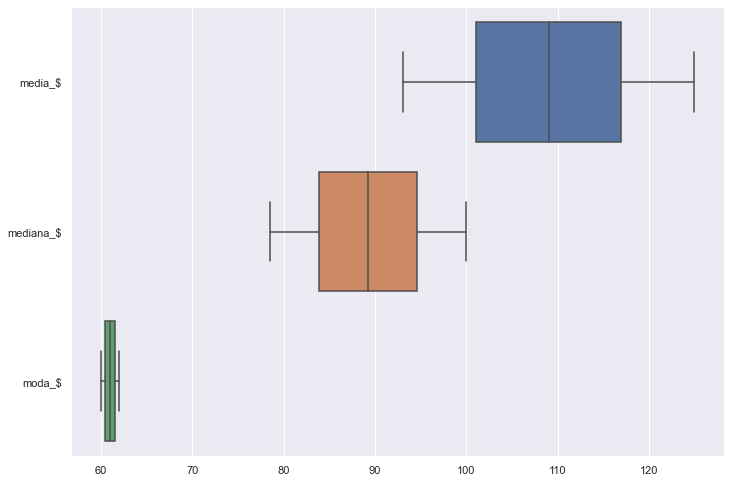

In [256]:
# sb.boxplot(x='terminado',y=df['precio'],data=df_mt)
# plt.axhline(moda.any(), color ="r", linestyle = '--', linewidth = 5)
# plt.axhline(mediana.any(), color ="g", linestyle = '--', linewidth = 5)
sb.boxplot(data=df_mt,orient='h')

In [161]:
# sb.boxenplot(x='parqueadero',y='precio',data=df)
# plt.axhline(df['precio'].mean(), color ="r", linestyle = '--', linewidth = 5)
# plt.axhline(df['precio'].median(), color ="g", linestyle = '--', linewidth = 5)
# plt.axhline(df['precio'].mode().values, color ="y", linestyle = 'dashdot', linewidth = 5)
